# Binary Classification

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
pwd

'D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based'

In [3]:
df = pd.read_csv('D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based\\DATA\\hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [7]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

<AxesSubplot:>

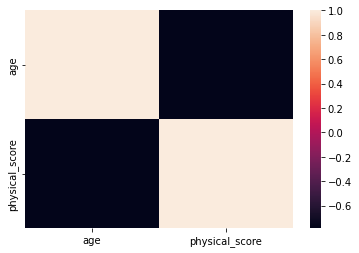

In [11]:
sns.heatmap(df.drop(['test_result'],axis=1).corr())

In [13]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

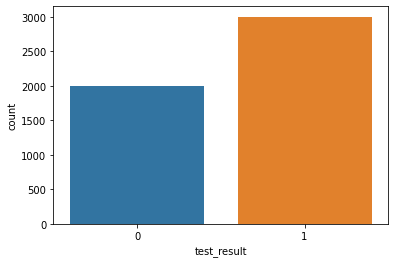

In [17]:
sns.countplot(data=df, x = df['test_result'])

<AxesSubplot:xlabel='age', ylabel='test_result'>

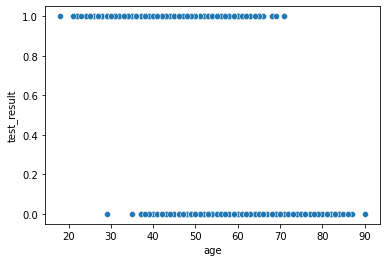

In [14]:
sns.scatterplot(data=df, x= 'age' , y='test_result')

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

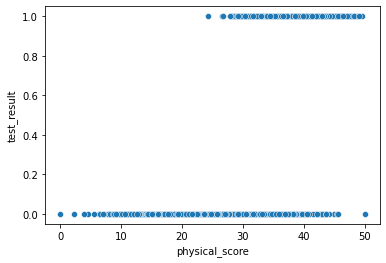

In [15]:
sns.scatterplot(data=df, x= 'physical_score' , y='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

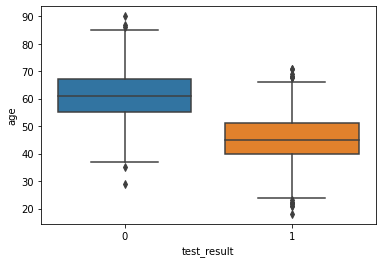

In [18]:
sns.boxplot(data=df, x='test_result' , y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

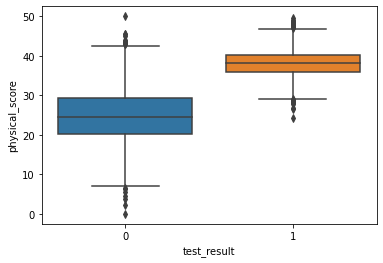

In [19]:
sns.boxplot(data=df, x='test_result' , y='physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

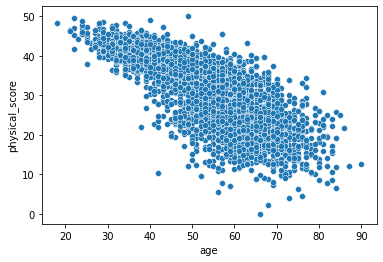

In [21]:
sns.scatterplot(data=df, y= 'physical_score' , x='age')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

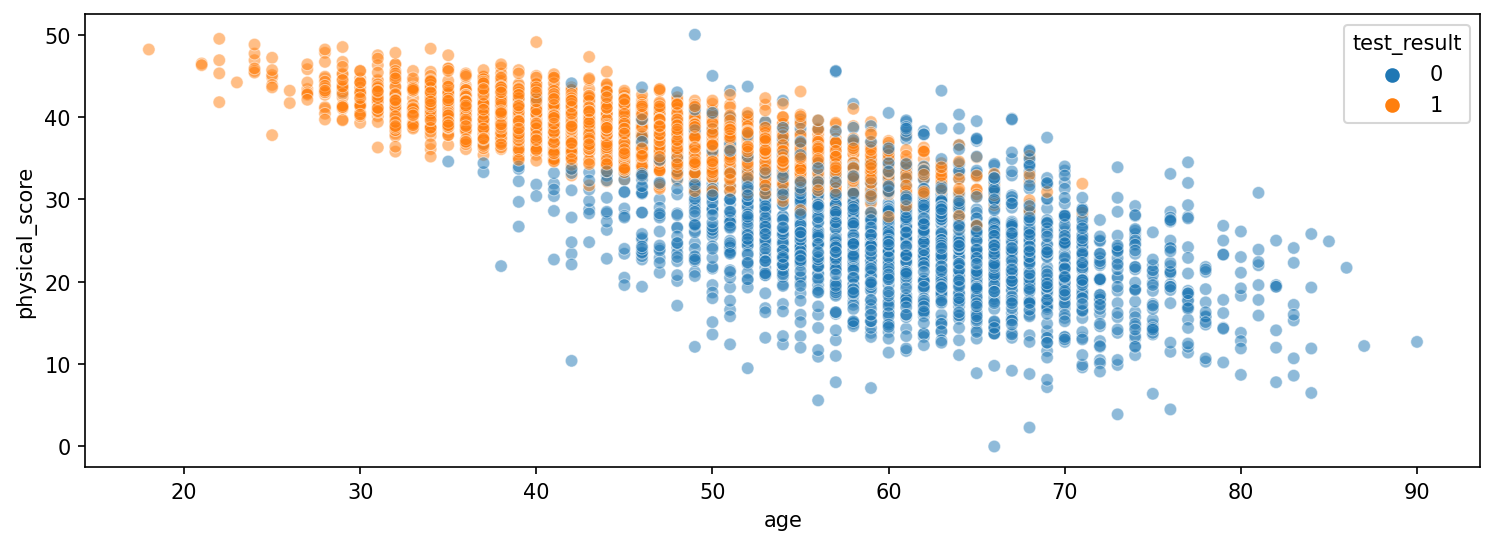

In [25]:
plt.figure(figsize=(12,4) , dpi = 150)
sns.scatterplot(data=df, y= 'physical_score' , x='age' , hue = 'test_result' , alpha = 0.5)

<Figure size 864x288 with 0 Axes>

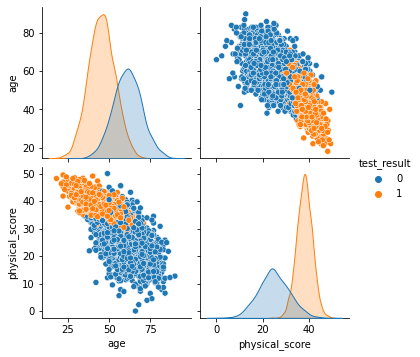

In [27]:
plt.figure(figsize=(12,4))
sns.pairplot(data=df, hue='test_result')

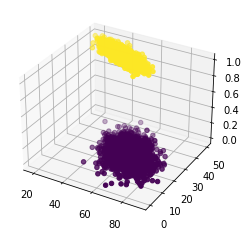

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [29]:
X = df.drop(['test_result'],axis=1)

In [30]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [31]:
y = df['test_result']

In [32]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [38]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
help(scaler)

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like 

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [45]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [46]:
log_model.intercept_

array([0.48867341])

In [53]:
test_preds = log_model.predict(X_test)

In [54]:
test_preds

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [57]:
test_preds2 = np.round(log_model.predict_proba(X_test), 2 )# If we want to set the threshold ourselves..

In [58]:
test_preds2

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.39, 0.61],
       [0.37, 0.63],
       [0.58, 0.42],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.02,

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.


* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 
The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.
The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

### Classification Metrics

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,

In [73]:
from sklearn.metrics import  precision_score , recall_score

In [63]:
accuracy_score(y_test,test_preds)

0.93

In [74]:
precision_score(y_test,test_preds)

0.9331210191082803

In [75]:
recall_score(y_test,test_preds)

0.9543973941368078

In [64]:
confusion_matrix(y_test,test_preds)

array([[172,  21],
       [ 14, 293]], dtype=int64)

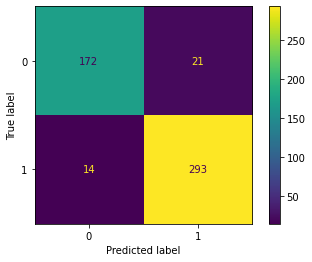

In [66]:
plot_confusion_matrix(log_model,X_test,y_test)

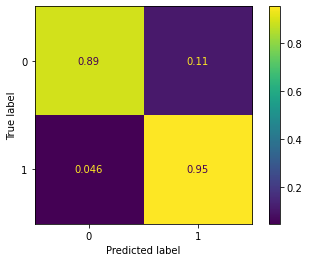

In [67]:
plot_confusion_matrix(log_model,X_test,y_test,normalize='true')

In [68]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



## Evaluating Curves and AUC


In [69]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

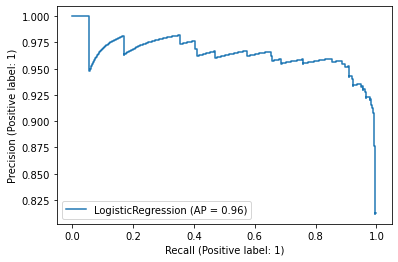

In [70]:
plot_precision_recall_curve(log_model,X_test,y_test)

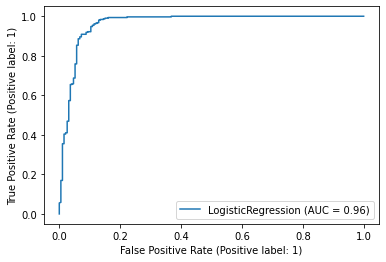

In [71]:
plot_roc_curve(log_model,X_test,y_test)

# Multi Class Classification

In [76]:
df = pd.read_csv('D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based\\DATA\\iris.csv')

In [77]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:>

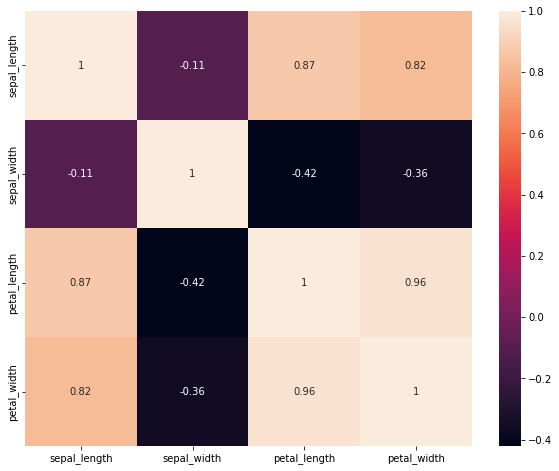

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['species'],axis=1).corr() , annot=True)

<AxesSubplot:xlabel='species', ylabel='count'>

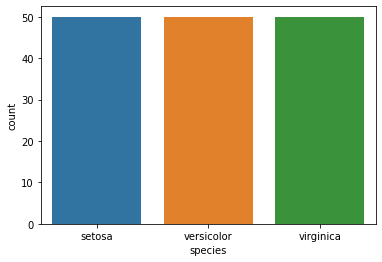

In [87]:
sns.countplot(data=df, x='species')

<Figure size 864x576 with 0 Axes>

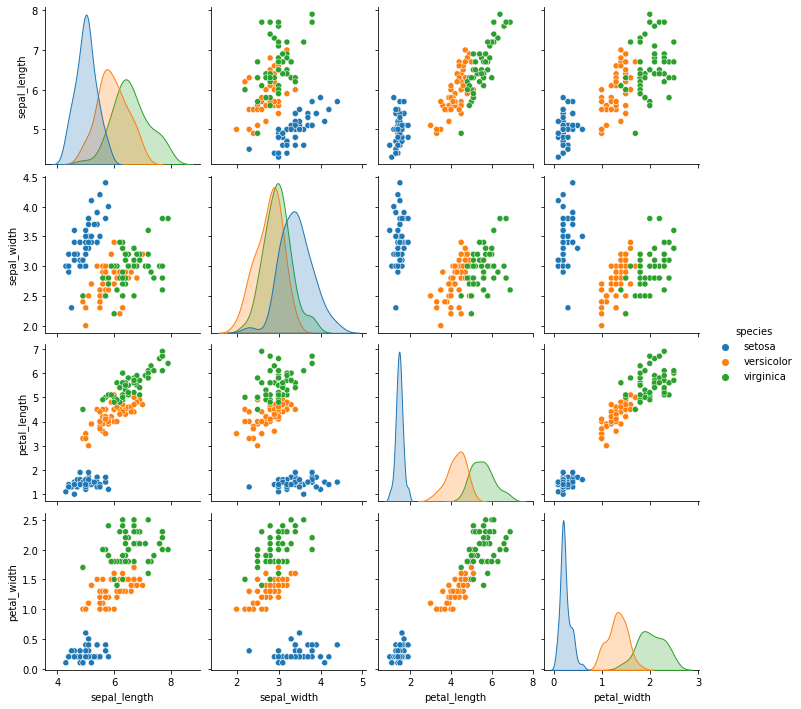

In [85]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, hue='species')

In [86]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


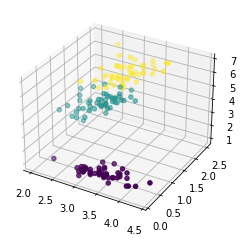

In [94]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

In [90]:
X = df.drop(['species'],axis=1)

In [91]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
y = df['species']

In [93]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [97]:
scaler = StandardScaler()

In [98]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.model_selection import GridSearchCV

In [113]:
og_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000000)

In [114]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [115]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [116]:
grid_model.fit(X_train,y_train)

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Installed\Anaconda\envs\tf

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Installed\Anaconda\envs\tf

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Installed\Anaconda\envs\tf

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [122]:
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

In [166]:
grid_model_preds = grid_model.predict(X_test)

In [167]:
grid_model_preds

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [168]:
y_test

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
123     virginica
68     versicolor
53     versicolor
146     virginica
1          setosa
147     virginica
32         setosa
31         setosa
122     virginica
127     virginica
74     versicolor
88     versicolor
96     versicolor
42         setosa
134     virginica
80     versicolor
48         setosa
90     versicolor
65     versicolor
97     versicolor
64     versicolor
93     versicolor
114     virginica
25         setosa
41         setosa
104     virginica
89     versicolor
116     virginica
82     versicolor
112     virginica
55     versicolor
86     versicolor
61     versicolor
Name: species, dtype: object

In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [170]:
accuracy_score(y_test,grid_model_preds)

1.0

In [171]:
confusion_matrix(y_test,grid_model_preds)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]], dtype=int64)

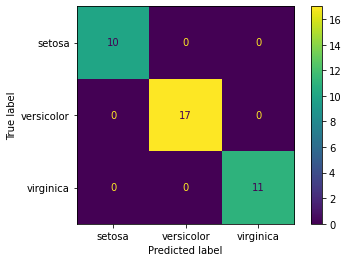

In [172]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [173]:
print(classification_report(y_test,grid_model_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [174]:
from sklearn.metrics import roc_curve, auc

In [175]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

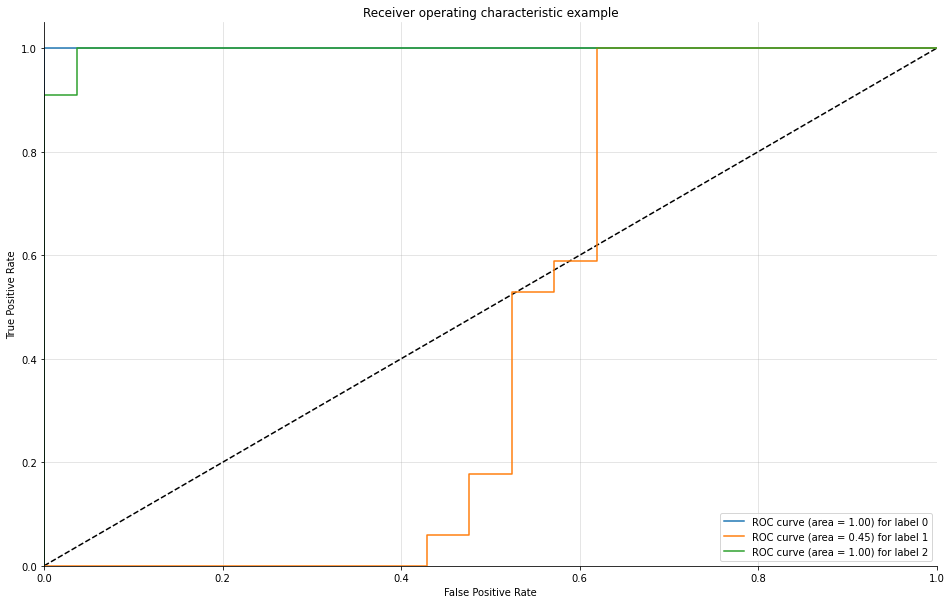

In [176]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

### Lets try with Tensorflow ; Not exactly Logistic regression but it's the closest I can simulate!

In [187]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
tf.keras.backend.clear_session()

In [188]:
X_train.shape

(112, 4)

In [189]:
x_tf = Input(shape=(None,4))
y_tf = Dense(3 , activation='softmax')(x_tf)


In [190]:
model = tf.keras.models.Model(inputs=x_tf , outputs=y_tf)

In [191]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [192]:
y_train_tf = y_train.apply(lambda x : 0 if x =='setosa' else(1 if x == 'versicolor' else 2 ) ).values
y_test_tf = y_test.apply(lambda x : 0 if x =='setosa' else(1 if x == 'versicolor' else 2 ) ).values

In [193]:
X_train_tf = X_train.values
X_test_tf = X_test.values

In [194]:
y_train_tf

array([1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [195]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'] , optimizer='adam')

In [196]:
history = model.fit(X_train_tf, y_train_tf , epochs = 1000 , validation_data=(X_test_tf,y_test_tf)  )

Epoch 1/1000
4/4 [==============================] - 1s 73ms/step - loss: 6.6046 - accuracy: 0.3571 - val_loss: 7.2878 - val_accuracy: 0.2632
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 6.5219 - accuracy: 0.3571 - val_loss: 7.1942 - val_accuracy: 0.2632
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.4372 - accuracy: 0.3571 - val_loss: 7.1005 - val_accuracy: 0.2632
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.3525 - accuracy: 0.3571 - val_loss: 7.0070 - val_accuracy: 0.2632
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.2651 - accuracy: 0.3571 - val_loss: 6.9140 - val_accuracy: 0.2632
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.1816 - accuracy: 0.3571 - val_loss: 6.8208 - val_accuracy: 0.2632
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.0946 - accuracy: 0.3571 - val_loss: 6.7290 - val_accuracy: 0.2632
Epoch 8/1000


4/4 [==============================] - 0s 14ms/step - loss: 2.5204 - accuracy: 0.3571 - val_loss: 2.7988 - val_accuracy: 0.2632
Epoch 53/1000
4/4 [==============================] - 0s 17ms/step - loss: 2.4610 - accuracy: 0.3571 - val_loss: 2.7263 - val_accuracy: 0.2632
Epoch 54/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.3960 - accuracy: 0.3571 - val_loss: 2.6562 - val_accuracy: 0.2632
Epoch 55/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.3349 - accuracy: 0.3571 - val_loss: 2.5871 - val_accuracy: 0.2632
Epoch 56/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.2736 - accuracy: 0.3571 - val_loss: 2.5200 - val_accuracy: 0.2632
Epoch 57/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.2161 - accuracy: 0.3571 - val_loss: 2.4539 - val_accuracy: 0.2632
Epoch 58/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.1587 - accuracy: 0.3571 - val_loss: 2.3892 - val_accuracy: 0.2632
Epoch 59/1000
4/4 [=

4/4 [==============================] - 0s 17ms/step - loss: 1.1922 - accuracy: 0.2679 - val_loss: 1.2381 - val_accuracy: 0.2105
Epoch 110/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.1889 - accuracy: 0.2768 - val_loss: 1.2339 - val_accuracy: 0.2105
Epoch 111/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.1857 - accuracy: 0.2768 - val_loss: 1.2300 - val_accuracy: 0.2105
Epoch 112/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.1825 - accuracy: 0.2946 - val_loss: 1.2263 - val_accuracy: 0.2105
Epoch 113/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1794 - accuracy: 0.2946 - val_loss: 1.2234 - val_accuracy: 0.2105
Epoch 114/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.1764 - accuracy: 0.3036 - val_loss: 1.2198 - val_accuracy: 0.2105
Epoch 115/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.1732 - accuracy: 0.3125 - val_loss: 1.2168 - val_accuracy: 0.2105
Epoch 116/1000

4/4 [==============================] - 0s 16ms/step - loss: 1.0347 - accuracy: 0.5000 - val_loss: 1.0908 - val_accuracy: 0.3684
Epoch 167/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0321 - accuracy: 0.5000 - val_loss: 1.0884 - val_accuracy: 0.3684
Epoch 168/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.0295 - accuracy: 0.5089 - val_loss: 1.0859 - val_accuracy: 0.3947
Epoch 169/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0271 - accuracy: 0.5089 - val_loss: 1.0828 - val_accuracy: 0.3947
Epoch 170/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0246 - accuracy: 0.5268 - val_loss: 1.0806 - val_accuracy: 0.3947
Epoch 171/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0220 - accuracy: 0.5357 - val_loss: 1.0787 - val_accuracy: 0.3947
Epoch 172/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0194 - accuracy: 0.5446 - val_loss: 1.0762 - val_accuracy: 0.3947
Epoch 173/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.8993 - accuracy: 0.7054 - val_loss: 0.9802 - val_accuracy: 0.5526
Epoch 224/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8972 - accuracy: 0.7054 - val_loss: 0.9778 - val_accuracy: 0.5526
Epoch 225/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8952 - accuracy: 0.7054 - val_loss: 0.9760 - val_accuracy: 0.5526
Epoch 226/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8930 - accuracy: 0.7054 - val_loss: 0.9743 - val_accuracy: 0.5526
Epoch 227/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8909 - accuracy: 0.7054 - val_loss: 0.9718 - val_accuracy: 0.5526
Epoch 228/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8888 - accuracy: 0.7054 - val_loss: 0.9700 - val_accuracy: 0.5526
Epoch 229/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.8867 - accuracy: 0.7054 - val_loss: 0.9681 - val_accuracy: 0.5526
Epoch 230/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.7905 - accuracy: 0.7054 - val_loss: 0.8851 - val_accuracy: 0.5526
Epoch 281/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7888 - accuracy: 0.7054 - val_loss: 0.8841 - val_accuracy: 0.5526
Epoch 282/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7870 - accuracy: 0.7054 - val_loss: 0.8821 - val_accuracy: 0.5526
Epoch 283/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7853 - accuracy: 0.7054 - val_loss: 0.8802 - val_accuracy: 0.5526
Epoch 284/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7836 - accuracy: 0.7054 - val_loss: 0.8783 - val_accuracy: 0.5526
Epoch 285/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7820 - accuracy: 0.7054 - val_loss: 0.8759 - val_accuracy: 0.5526
Epoch 286/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.7804 - accuracy: 0.7054 - val_loss: 0.8736 - val_accuracy: 0.5526
Epoch 287/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.7057 - accuracy: 0.7054 - val_loss: 0.8063 - val_accuracy: 0.5526
Epoch 338/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7044 - accuracy: 0.7143 - val_loss: 0.8050 - val_accuracy: 0.5526
Epoch 339/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7032 - accuracy: 0.7143 - val_loss: 0.8041 - val_accuracy: 0.5526
Epoch 340/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7018 - accuracy: 0.7054 - val_loss: 0.8036 - val_accuracy: 0.5526
Epoch 341/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7007 - accuracy: 0.7054 - val_loss: 0.8030 - val_accuracy: 0.5526
Epoch 342/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.6994 - accuracy: 0.7054 - val_loss: 0.8015 - val_accuracy: 0.5526
Epoch 343/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6982 - accuracy: 0.7143 - val_loss: 0.7987 - val_accuracy: 0.5526
Epoch 344/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.6409 - accuracy: 0.7054 - val_loss: 0.7463 - val_accuracy: 0.5526
Epoch 395/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.6397 - accuracy: 0.7054 - val_loss: 0.7454 - val_accuracy: 0.5526
Epoch 396/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.6386 - accuracy: 0.7054 - val_loss: 0.7441 - val_accuracy: 0.5526
Epoch 397/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6377 - accuracy: 0.7054 - val_loss: 0.7427 - val_accuracy: 0.5526
Epoch 398/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6366 - accuracy: 0.7054 - val_loss: 0.7406 - val_accuracy: 0.5526
Epoch 399/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.6358 - accuracy: 0.7143 - val_loss: 0.7381 - val_accuracy: 0.5526
Epoch 400/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.6350 - accuracy: 0.7321 - val_loss: 0.7365 - val_accuracy: 0.5526
Epoch 401/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.5896 - accuracy: 0.7143 - val_loss: 0.6973 - val_accuracy: 0.5526
Epoch 452/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.5888 - accuracy: 0.7143 - val_loss: 0.6967 - val_accuracy: 0.5526
Epoch 453/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5882 - accuracy: 0.7143 - val_loss: 0.6950 - val_accuracy: 0.5526
Epoch 454/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5872 - accuracy: 0.7143 - val_loss: 0.6945 - val_accuracy: 0.5526
Epoch 455/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5868 - accuracy: 0.7143 - val_loss: 0.6949 - val_accuracy: 0.5526
Epoch 456/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5857 - accuracy: 0.7143 - val_loss: 0.6939 - val_accuracy: 0.5526
Epoch 457/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5852 - accuracy: 0.7143 - val_loss: 0.6919 - val_accuracy: 0.5526
Epoch 458/1000

Epoch 508/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5482 - accuracy: 0.7411 - val_loss: 0.6538 - val_accuracy: 0.5789
Epoch 509/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5475 - accuracy: 0.7411 - val_loss: 0.6523 - val_accuracy: 0.5789
Epoch 510/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5469 - accuracy: 0.7411 - val_loss: 0.6512 - val_accuracy: 0.5789
Epoch 511/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5461 - accuracy: 0.7411 - val_loss: 0.6492 - val_accuracy: 0.5789
Epoch 512/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5453 - accuracy: 0.7500 - val_loss: 0.6468 - val_accuracy: 0.5789
Epoch 513/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5449 - accuracy: 0.7500 - val_loss: 0.6442 - val_accuracy: 0.6316
Epoch 514/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5445 - accuracy: 0.7679 - val_loss: 0.6423 - val_accuracy: 0.6316

4/4 [==============================] - 0s 17ms/step - loss: 0.5135 - accuracy: 0.7768 - val_loss: 0.6118 - val_accuracy: 0.6842
Epoch 566/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5129 - accuracy: 0.7768 - val_loss: 0.6124 - val_accuracy: 0.6579
Epoch 567/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5123 - accuracy: 0.7768 - val_loss: 0.6122 - val_accuracy: 0.6579
Epoch 568/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5119 - accuracy: 0.7768 - val_loss: 0.6126 - val_accuracy: 0.6579
Epoch 569/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.5113 - accuracy: 0.7679 - val_loss: 0.6125 - val_accuracy: 0.6579
Epoch 570/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5112 - accuracy: 0.7679 - val_loss: 0.6107 - val_accuracy: 0.6579
Epoch 571/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5101 - accuracy: 0.7679 - val_loss: 0.6114 - val_accuracy: 0.6579
Epoch 572/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.4838 - accuracy: 0.7768 - val_loss: 0.5854 - val_accuracy: 0.6579
Epoch 623/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4836 - accuracy: 0.7768 - val_loss: 0.5840 - val_accuracy: 0.7105
Epoch 624/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.4830 - accuracy: 0.7768 - val_loss: 0.5848 - val_accuracy: 0.6579
Epoch 625/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4823 - accuracy: 0.7768 - val_loss: 0.5847 - val_accuracy: 0.6579
Epoch 626/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4821 - accuracy: 0.7768 - val_loss: 0.5842 - val_accuracy: 0.6579
Epoch 627/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4814 - accuracy: 0.7768 - val_loss: 0.5848 - val_accuracy: 0.6579
Epoch 628/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4810 - accuracy: 0.7768 - val_loss: 0.5840 - val_accuracy: 0.6579
Epoch 629/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.4579 - accuracy: 0.8839 - val_loss: 0.5501 - val_accuracy: 0.8158
Epoch 680/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4574 - accuracy: 0.8839 - val_loss: 0.5497 - val_accuracy: 0.8158
Epoch 681/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4569 - accuracy: 0.8839 - val_loss: 0.5496 - val_accuracy: 0.8158
Epoch 682/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4564 - accuracy: 0.8839 - val_loss: 0.5500 - val_accuracy: 0.8158
Epoch 683/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4559 - accuracy: 0.8750 - val_loss: 0.5503 - val_accuracy: 0.7895
Epoch 684/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4555 - accuracy: 0.8482 - val_loss: 0.5510 - val_accuracy: 0.7895
Epoch 685/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4551 - accuracy: 0.8482 - val_loss: 0.5520 - val_accuracy: 0.7895
Epoch 686/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.4344 - accuracy: 0.9018 - val_loss: 0.5260 - val_accuracy: 0.8947
Epoch 737/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4340 - accuracy: 0.9107 - val_loss: 0.5252 - val_accuracy: 0.8947
Epoch 738/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4337 - accuracy: 0.9107 - val_loss: 0.5243 - val_accuracy: 0.8947
Epoch 739/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4332 - accuracy: 0.9107 - val_loss: 0.5248 - val_accuracy: 0.8947
Epoch 740/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4328 - accuracy: 0.9018 - val_loss: 0.5249 - val_accuracy: 0.8947
Epoch 741/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4326 - accuracy: 0.8929 - val_loss: 0.5255 - val_accuracy: 0.8684
Epoch 742/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4321 - accuracy: 0.9018 - val_loss: 0.5247 - val_accuracy: 0.8947
Epoch 743/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.4131 - accuracy: 0.9196 - val_loss: 0.5002 - val_accuracy: 0.9211
Epoch 794/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4131 - accuracy: 0.9196 - val_loss: 0.4987 - val_accuracy: 0.9474
Epoch 795/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4125 - accuracy: 0.9196 - val_loss: 0.4986 - val_accuracy: 0.9474
Epoch 796/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4121 - accuracy: 0.9196 - val_loss: 0.4991 - val_accuracy: 0.9211
Epoch 797/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4118 - accuracy: 0.9196 - val_loss: 0.4993 - val_accuracy: 0.9211
Epoch 798/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4113 - accuracy: 0.9196 - val_loss: 0.4990 - val_accuracy: 0.9211
Epoch 799/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4112 - accuracy: 0.9196 - val_loss: 0.4979 - val_accuracy: 0.9211
Epoch 800/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.3937 - accuracy: 0.9196 - val_loss: 0.4797 - val_accuracy: 0.9474
Epoch 851/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3934 - accuracy: 0.9196 - val_loss: 0.4791 - val_accuracy: 0.9474
Epoch 852/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3930 - accuracy: 0.9196 - val_loss: 0.4796 - val_accuracy: 0.9474
Epoch 853/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3929 - accuracy: 0.9196 - val_loss: 0.4804 - val_accuracy: 0.9474
Epoch 854/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3926 - accuracy: 0.9196 - val_loss: 0.4791 - val_accuracy: 0.9474
Epoch 855/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3920 - accuracy: 0.9196 - val_loss: 0.4778 - val_accuracy: 0.9474
Epoch 856/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3919 - accuracy: 0.9196 - val_loss: 0.4767 - val_accuracy: 0.9474
Epoch 857/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.3755 - accuracy: 0.9464 - val_loss: 0.4580 - val_accuracy: 0.9474
Epoch 908/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3753 - accuracy: 0.9464 - val_loss: 0.4570 - val_accuracy: 0.9474
Epoch 909/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.3750 - accuracy: 0.9464 - val_loss: 0.4559 - val_accuracy: 0.9737
Epoch 910/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3746 - accuracy: 0.9464 - val_loss: 0.4554 - val_accuracy: 0.9737
Epoch 911/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3743 - accuracy: 0.9464 - val_loss: 0.4551 - val_accuracy: 0.9737
Epoch 912/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3741 - accuracy: 0.9464 - val_loss: 0.4545 - val_accuracy: 0.9737
Epoch 913/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3737 - accuracy: 0.9464 - val_loss: 0.4548 - val_accuracy: 0.9737
Epoch 914/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.3589 - accuracy: 0.9464 - val_loss: 0.4374 - val_accuracy: 0.9737
Epoch 965/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3585 - accuracy: 0.9464 - val_loss: 0.4370 - val_accuracy: 0.9737
Epoch 966/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3582 - accuracy: 0.9464 - val_loss: 0.4366 - val_accuracy: 0.9737
Epoch 967/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3582 - accuracy: 0.9464 - val_loss: 0.4357 - val_accuracy: 0.9737
Epoch 968/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3576 - accuracy: 0.9464 - val_loss: 0.4355 - val_accuracy: 0.9737
Epoch 969/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3574 - accuracy: 0.9464 - val_loss: 0.4353 - val_accuracy: 0.9737
Epoch 970/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3570 - accuracy: 0.9464 - val_loss: 0.4358 - val_accuracy: 0.9737
Epoch 971/1000

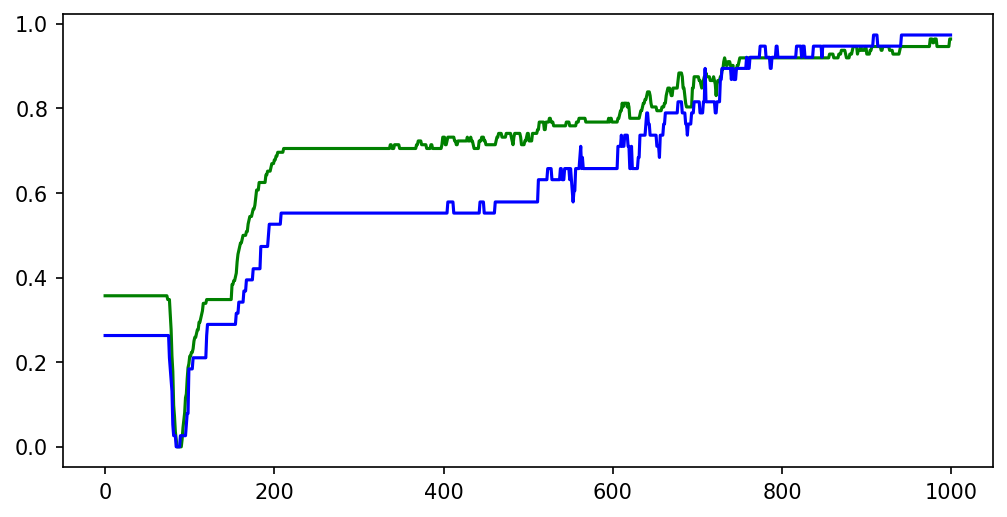

In [200]:
plt.figure(figsize=(8,4), dpi=150)
plt.plot(history.history['accuracy'] , color='green')
plt.plot(history.history['val_accuracy'] , color='blue')

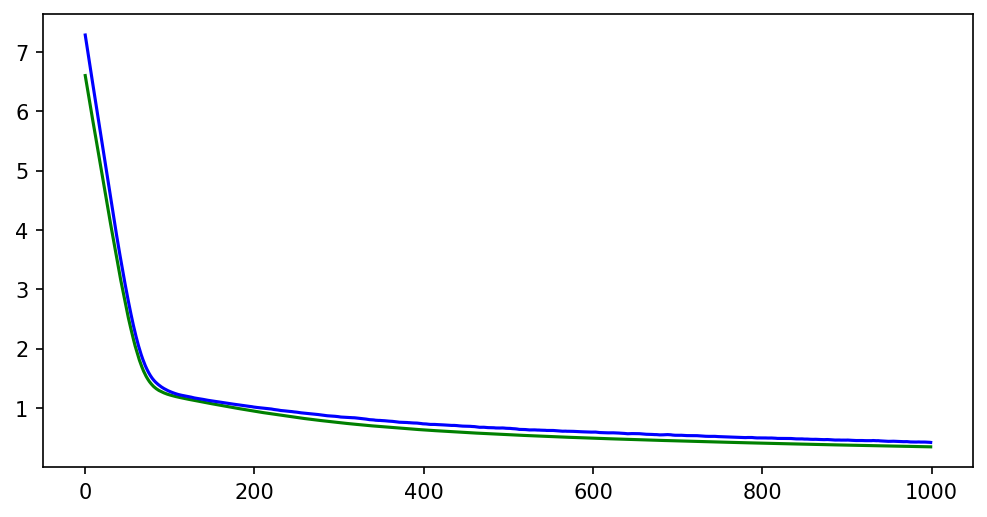

In [201]:
plt.figure(figsize=(8,4), dpi=150)
plt.plot(history.history['loss'] , color='green')
plt.plot(history.history['val_loss'] , color='blue')

In [202]:
tf_model_preds = model.predict(X_test_tf) 

In [203]:
tf_model_preds.shape

(38, 3)

In [204]:
tf_model_preds[0]

array([9.6521074e-01, 3.3889063e-02, 9.0021727e-04], dtype=float32)

## Compare both the models

In [205]:
tf_model_out = []
for res in tf_model_preds:
    tf_model_out.append(np.argmax(res))
    

In [206]:
np.array(tf_model_out)

array([0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1], dtype=int64)

In [207]:
y_test_tf

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1], dtype=int64)

In [208]:
np.mean(np.array(tf_model_out) == y_test_tf)

0.9736842105263158